# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

Mounted at /content/drive


#Data Loading and Exploration

Load Dataset

In [ ]:
file_path = '/content/drive/My Drive/adult income dataset.csv'
data = pd.read_csv(file_path)

num_data_points = data.shape[0]
num_features = data.shape[1]

print(f"Number of data points: {num_data_points}\n")
print(f"Number of features: {num_features}")

print("\nDataset loaded. First 5 rows:")
print(data.head())

Number of data points: 48842

Number of features: 15

Dataset loaded. First 5 rows:
   Age         Workclass  Final Weight  Education  Education Number of Years  \
0   39         State-gov         77516  Bachelors                         13   
1   50  Self-emp-not-inc         83311  Bachelors                         13   
2   38           Private        215646    HS-grad                          9   
3   53           Private        234721       11th                          7   
4   28           Private        338409  Bachelors                         13   

       Marital-status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  F

Check Raw Data

In [ ]:
data.columns = data.columns.str.strip()
print("\nDataFrame Info:")
data.info()

# check numerical columns
numerical_cols_doc = ['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
print("\nSummary Statistics for Numerical Features (from documentation list):")

present_numerical_cols_for_describe = []
for col in numerical_cols_doc:
    if col in data.columns:
        present_numerical_cols_for_describe.append(col)

if present_numerical_cols_for_describe:
    print(data[present_numerical_cols_for_describe].describe())
else:
    print("No numerical columns (from documentation list) found for description.")

# check target
if 'target' not in data.columns:
    print("Error: Target column 'target' not found in the dataset.")
    exit()

print("\nTarget Variable Distribution:")
print(data['target'].value_counts(normalize=True))

data.describe(include="all")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        48842 non-null  int64 
 1   Workclass                  48842 non-null  object
 2   Final Weight               48842 non-null  int64 
 3   Education                  48842 non-null  object
 4   Education Number of Years  48842 non-null  int64 
 5   Marital-status             48842 non-null  object
 6   Occupation                 48842 non-null  object
 7   Relationship               48842 non-null  object
 8   Race                       48842 non-null  object
 9   Sex                        48842 non-null  object
 10  Capital-gain               48842 non-null  int64 
 11  Capital-loss               48842 non-null  int64 
 12  Hours-per-week             48842 non-null  int64 
 13  Native-country             48842 non-null  o

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,target
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Check for Null and Duplicate Values

In [ ]:
data.isnull().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
Education Number of Years,0
Marital-status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
data.nunique()

,0
Age,74
Workclass,9
Final Weight,28523
Education,16
Education Number of Years,16
Marital-status,7
Occupation,15
Relationship,6
Race,5
Sex,2


Visualizing the Data

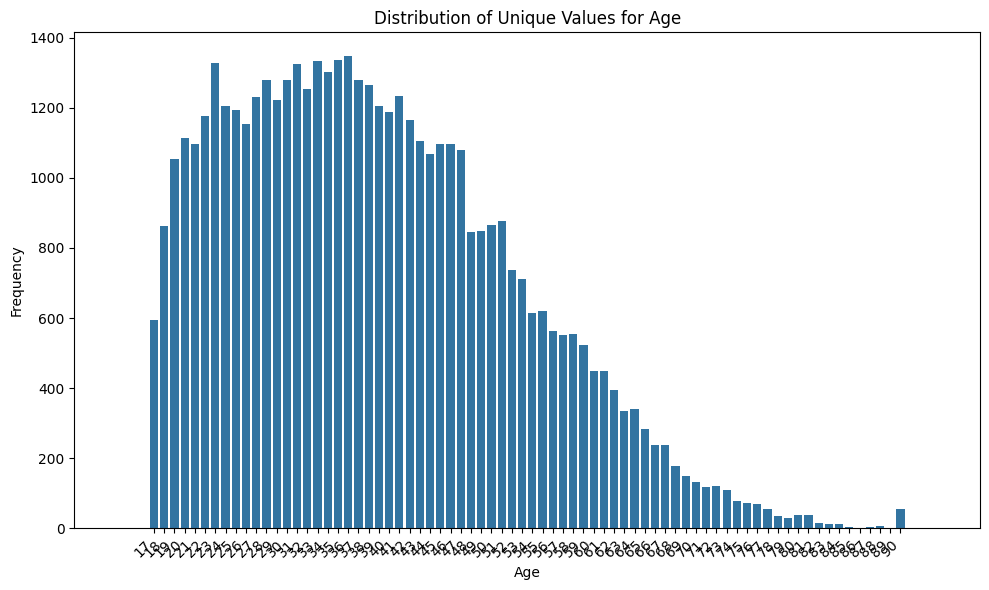

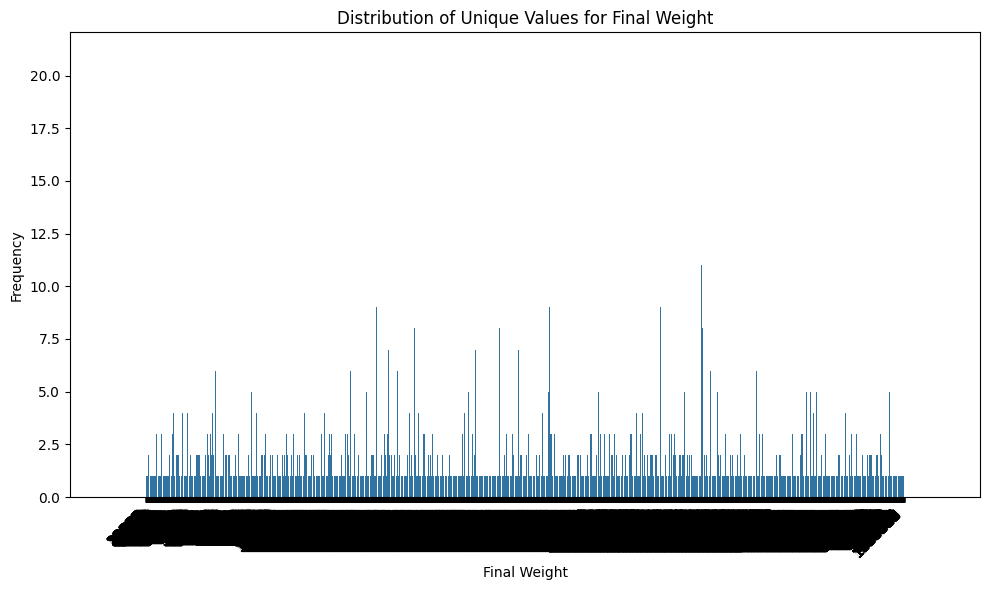

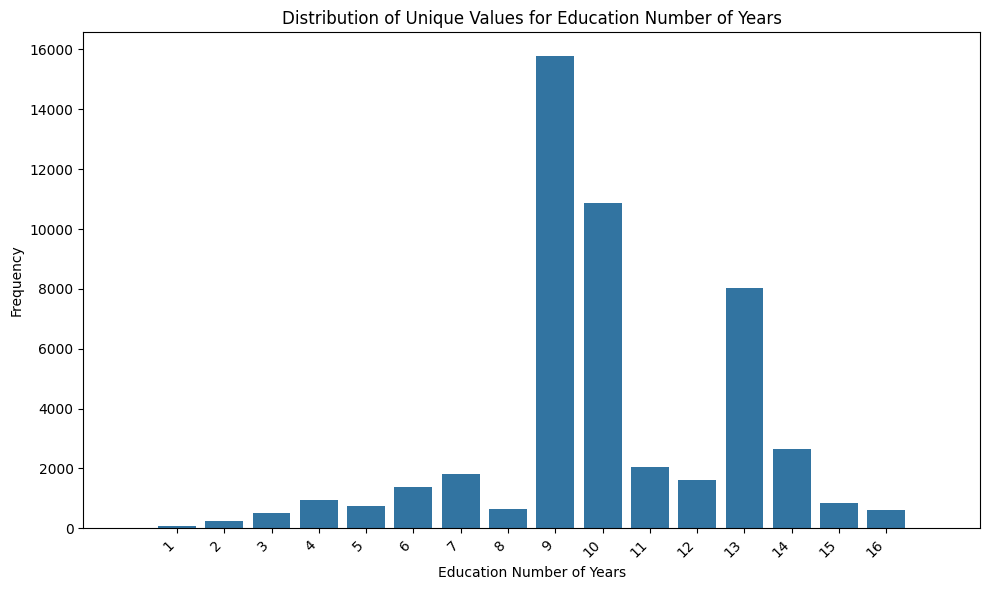

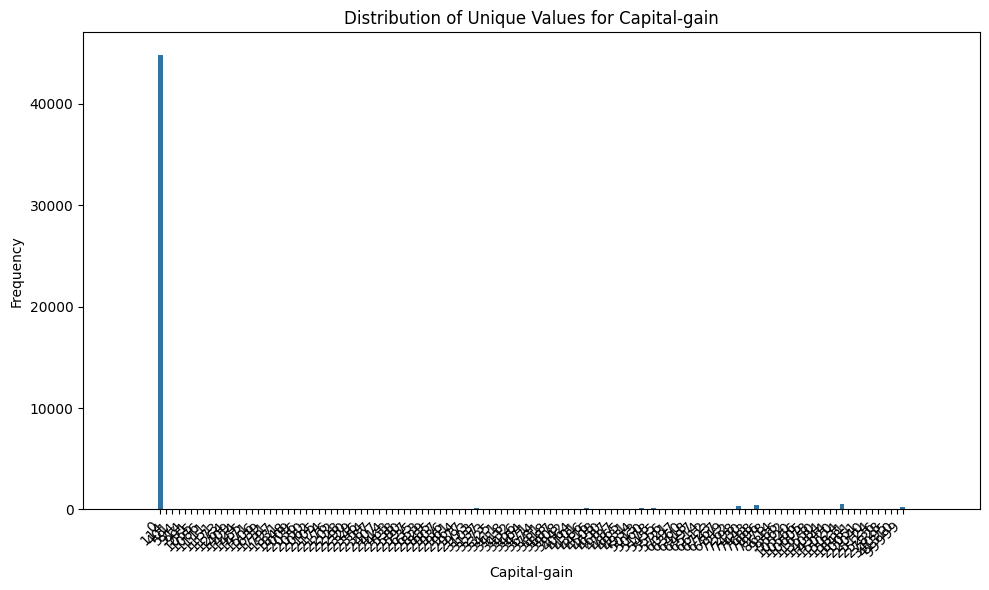

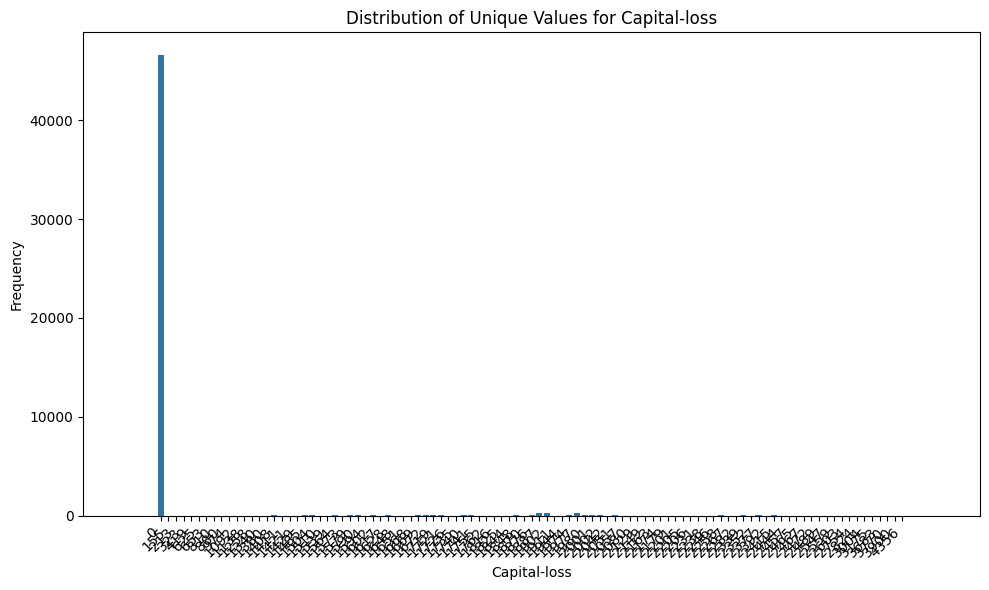

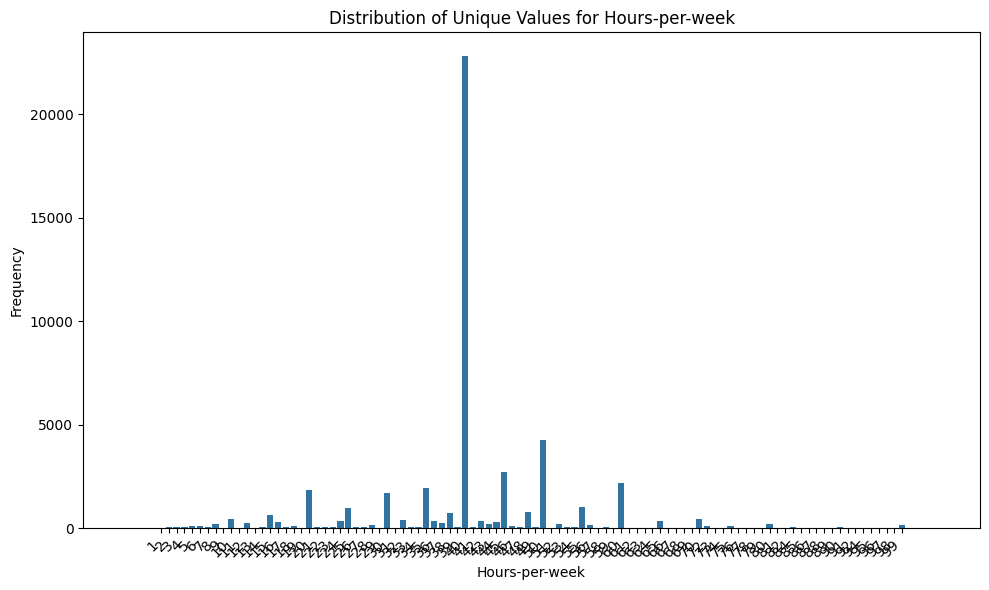

In [ ]:
# frequency distribution
for col in present_numerical_cols_for_describe:
    value_counts = data[col].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of Unique Values for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.gca().margins(x=0.1)
    plt.tight_layout()
    plt.show()

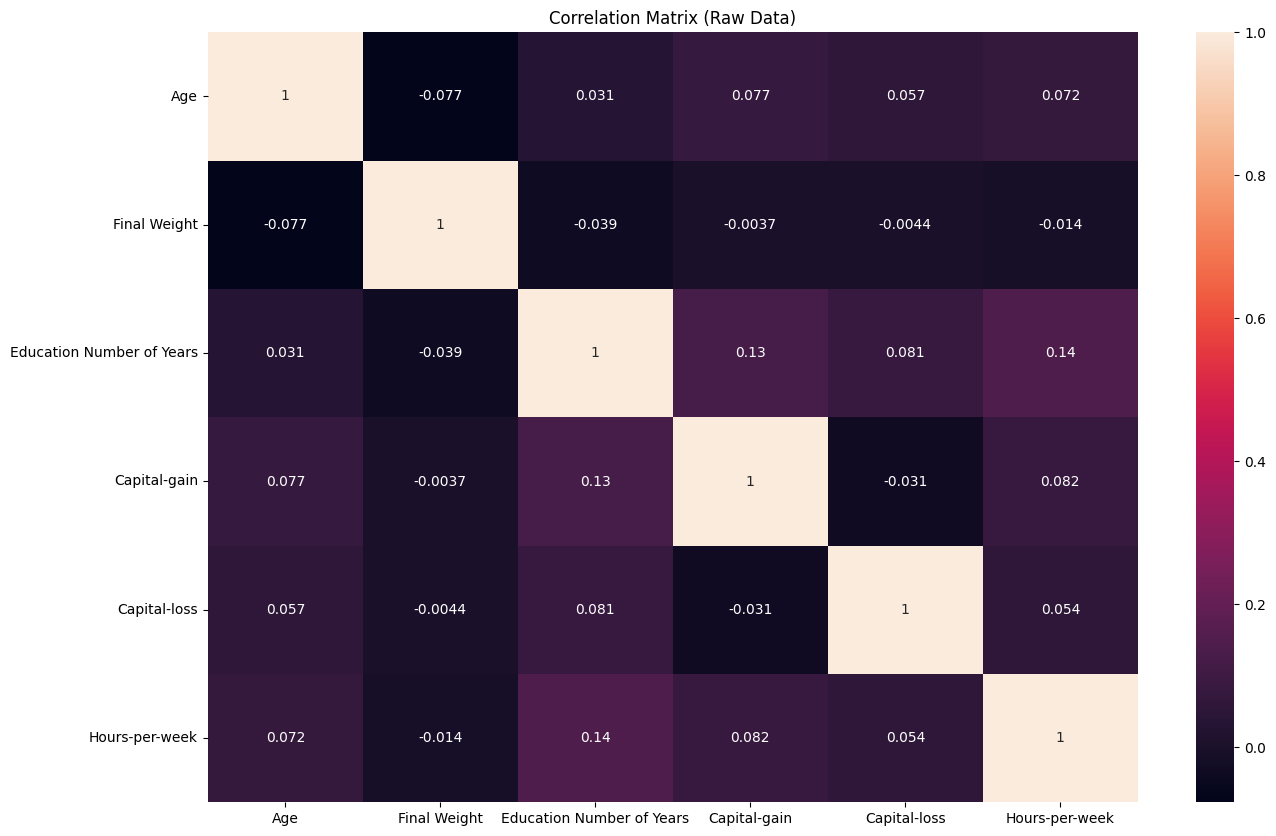

In [ ]:
# corelation matrix (heatmap)
numeric_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Matrix (Raw Data)')
plt.show()

Imbalanced Dataset

Class distribution for the target variable ('target'):
Class '<=50K' (encoded as 0): 37155 instances
Class '>50K' (encoded as 1): 11687 instances

Conclusion: All unique classes in the output feature DO NOT have an equal number of instances (Imbalanced).


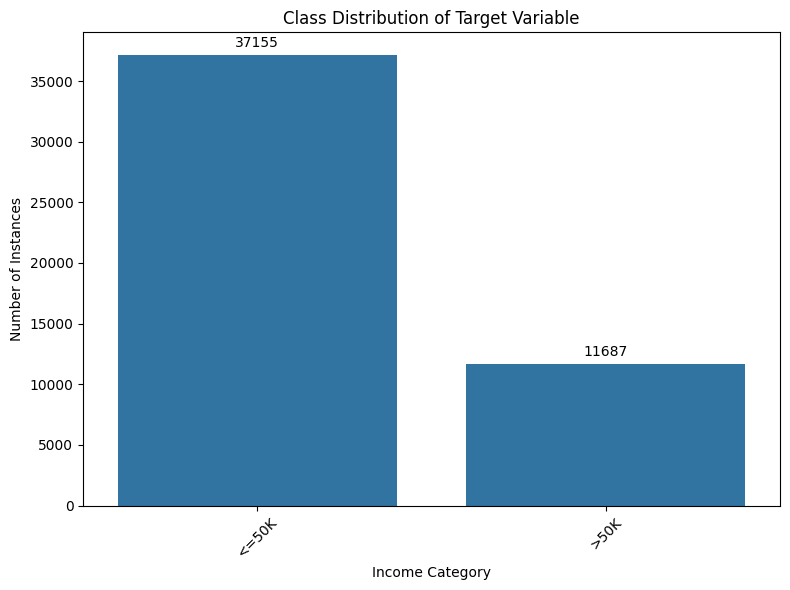

Bar chart of target variable class distribution displayed.


In [ ]:
class_counts = pd.Series(y_encoded).value_counts().sort_index()
class_names = label_encoder.classes_

print("Class distribution for the target variable ('target'):")
for i, count in enumerate(class_counts):
    print(f"Class '{class_names[i]}' (encoded as {class_counts.index[i]}): {count} instances")

# Check for imbalance
unique_counts = class_counts.nunique()
if unique_counts == 1 and len(class_counts) > 1:
    print("\nConclusion: All unique classes in the output feature have an equal number of instances (Balanced).")
else:
    print("\nConclusion: All unique classes in the output feature DO NOT have an equal number of instances (Imbalanced).")

# Bar chart representation of class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=class_counts.values)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Income Category')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
for i, count in enumerate(class_counts.values):
    plt.text(i, count + (0.01 * class_counts.values.max()), str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()
print("Bar chart of target variable class distribution displayed.")

#Data Preprocessing

Handling Missing Values

In [ ]:
# missing values
cols_with_missing_marker = ['Workclass', 'Occupation', 'Native-country']
for col_name in cols_with_missing_marker:
    if col_name in data.columns:
        data[col_name] = data[col_name].replace('?', np.nan)

# imputation
for col_name in cols_with_missing_marker:
    if col_name in data.columns and data[col_name].isnull().any():
        imputer = SimpleImputer(strategy='most_frequent')
        data[col_name] = imputer.fit_transform(data[[col_name]])[:, 0]
print("Missing values handled (replaced '?' and imputed with mode).")

Missing values handled (replaced '?' and imputed with mode).


Feature Engineering and Selection

In [ ]:
# dropping 'Education', 'Race', and 'Sex'
cols_to_drop = ['Education', 'Race', 'Sex']
data.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Columns dropped: {cols_to_drop}")

# prepare features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']
print(f"\nShape of features X: {X.shape}, Shape of target y: {y.shape}")

Columns dropped: ['Education', 'Race', 'Sex']

Shape of features X: (48842, 11), Shape of target y: (48842,)


Feature Encoding

In [ ]:
# target variable encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# feature variable encoding (One-Hot)
categorical_cols_in_X = X.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features in X to be one-hot encoded: {categorical_cols_in_X}")
X_encoded = pd.get_dummies(X, columns=categorical_cols_in_X, drop_first=False)
print(f"Shape of X after one-hot encoding: {X_encoded.shape}")

# identify numerical columns for scaling
numerical_features_for_scaling = []
for col in numerical_cols_doc:
    if col in X_encoded.columns:
        numerical_features_for_scaling.append(col)
print(f"\nNumerical features identified for scaling: {numerical_features_for_scaling}")


Categorical features in X to be one-hot encoded: ['Workclass', 'Marital-status', 'Occupation', 'Relationship', 'Native-country']
Shape of X after one-hot encoding: (48842, 82)

Numerical features identified for scaling: ['Age', 'Final Weight', 'Education Number of Years', 'Capital-gain', 'Capital-loss', 'Hours-per-week']


# Splitting Dataset

In [ ]:
# splitting using stratify
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.3,
    stratify=y_encoded,
    random_state=RANDOM_STATE
)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train class distribution: {np.bincount(y_train) / len(y_train)}")
print(f"y_test class distribution: {np.bincount(y_test) / len(y_test)}")

X_train shape: (34189, 82), X_test shape: (14653, 82)
y_train class distribution: [0.76071251 0.23928749]
y_test class distribution: [0.76073159 0.23926841]


#Feature Scalling

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# fit scaler on numerical features and transform
X_train_scaled[numerical_features_for_scaling] = scaler.fit_transform(X_train[numerical_features_for_scaling])
X_test_scaled[numerical_features_for_scaling] = scaler.transform(X_test[numerical_features_for_scaling])
print("Numerical features scaled.")

Numerical features scaled.


#Model Training

Creating Model Storage

In [ ]:
models = {}
model_predictions = {}
model_probabilities = {}

Logistic Regression

In [ ]:
lr_model = LogisticRegression(
    solver='lbfgs',
    C=1.0,
    max_iter=1000,
    random_state=RANDOM_STATE
)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
print("Logistic Regression training complete.")

Logistic Regression training complete.


Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=RANDOM_STATE
)
dt_model.fit(X_train_scaled, y_train)
models['Decision Tree'] = dt_model
print("Decision Tree training complete.")

Decision Tree training complete.


Neural Network

In [ ]:
# split training data into actual training + validation
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(
    X_train_scaled, y_train, test_size=0.1, random_state=RANDOM_STATE
)

input_dimension_nn = X_train_scaled.shape[1]

# define the model
nn_model = Sequential([
    InputLayer(input_shape=(input_dimension_nn,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile the model
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# print model summary
print("\nNeural Network Model Summary:")
nn_model.summary()

# define early stopping callback
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# train the model using validation data from train set
print("\nStarting Neural Network training...")
history_nn = nn_model.fit(
    X_train_nn, y_train_nn,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_nn, y_val_nn),
    callbacks=[early_stopping_cb],
    verbose=1
)

models['Neural Network'] = nn_model
print("Neural Network training complete.")


Neural Network Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         5,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,425 (29.00 KB)

 Trainable params: 7,425 (29.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting Neural Network training...
Epoch 1/50
962/962 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8285 - auc: 0.8500 - loss: 0.3759 - val_accuracy: 0.8415 - val_auc: 0.9059 - val_loss: 0.3265
Epoch 2/50
962/962 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8553 - auc: 0.9092 - loss: 0.3111 - val_accuracy: 0.8432 - val_auc: 0.9069 - val_loss: 0.3257
Epoch 3/50
962/962 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8570 - auc: 0.9114 - loss: 0.3077 - val_accuracy: 0.8426 - val_auc: 0.9073 - val_loss: 0.3255
Epoch 4/50
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8591 - auc: 0.9131 - loss: 0.3053 - val_accuracy: 0.8438 - val_auc: 0.9077 - val_loss: 0.3253
Epoch 5/50
962/962 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8594 - auc: 0.9145 - loss: 0.3032 - val_accuracy: 0.8453 - val_auc: 0.9080 - val_loss: 0.3255
Epoch 6/50
962/962 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8603 - auc: 0.9157 - loss: 0.3012 - val_accuracy: 0.8432 - val_auc: 0.9078 - val_loss: 0.3260
Epo

#Model Evaluation

Generate Predictions

In [ ]:
evaluation_results = {}

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
model_predictions['Logistic Regression'] = y_pred_lr
model_probabilities['Logistic Regression'] = y_pred_proba_lr

y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
model_predictions['Decision Tree'] = y_pred_dt
model_probabilities['Decision Tree'] = y_pred_proba_dt

y_pred_proba_nn = nn_model.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_proba_nn >= 0.5).astype(int)
model_predictions['Neural Network'] = y_pred_nn
model_probabilities['Neural Network'] = y_pred_proba_nn

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Calculate and Print Performance Metrics

In [ ]:
for model_name_iter, model_object in models.items():
    print(f"\n--- Performance Metrics for: {model_name_iter} ---")
    current_y_pred = model_predictions[model_name_iter]
    current_y_pred_proba = model_probabilities[model_name_iter]

    accuracy_val = accuracy_score(y_test, current_y_pred)
    class_report_str = classification_report(y_test, current_y_pred, target_names=label_encoder.classes_)
    conf_matrix = confusion_matrix(y_test, current_y_pred)
    auc_val = roc_auc_score(y_test, current_y_pred_proba)

    evaluation_results[model_name_iter] = {
        'Accuracy': accuracy_val,
        'Confusion Matrix': conf_matrix,
        'AUC': auc_val
    }
    print(f"Accuracy: {accuracy_val:.4f}")
    print(f"AUC Score: {auc_val:.4f}")
    print("Classification Report:")
    print(class_report_str)
    print("Confusion Matrix:")
    print(conf_matrix)


--- Performance Metrics for: Logistic Regression ---
Accuracy: 0.8506
AUC Score: 0.9032
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     11147
        >50K       0.73      0.59      0.65      3506

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653

Confusion Matrix:
[[10399   748]
 [ 1441  2065]]

--- Performance Metrics for: Decision Tree ---
Accuracy: 0.8586
AUC Score: 0.9028
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11147
        >50K       0.77      0.58      0.66      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.76      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Confusion Matrix:
[[10540   607]
 [ 1465  2041]]

--- Performance Metrics for: 

Prepare Data

In [ ]:
model_names_list = list(evaluation_results.keys())

accuracies_list = []
for name in model_names_list:
    accuracies_list.append(evaluation_results[name]['Accuracy'])

auc_scores_list = []
for name in model_names_list:
    auc_scores_list.append(evaluation_results[name]['AUC'])

Accuracy

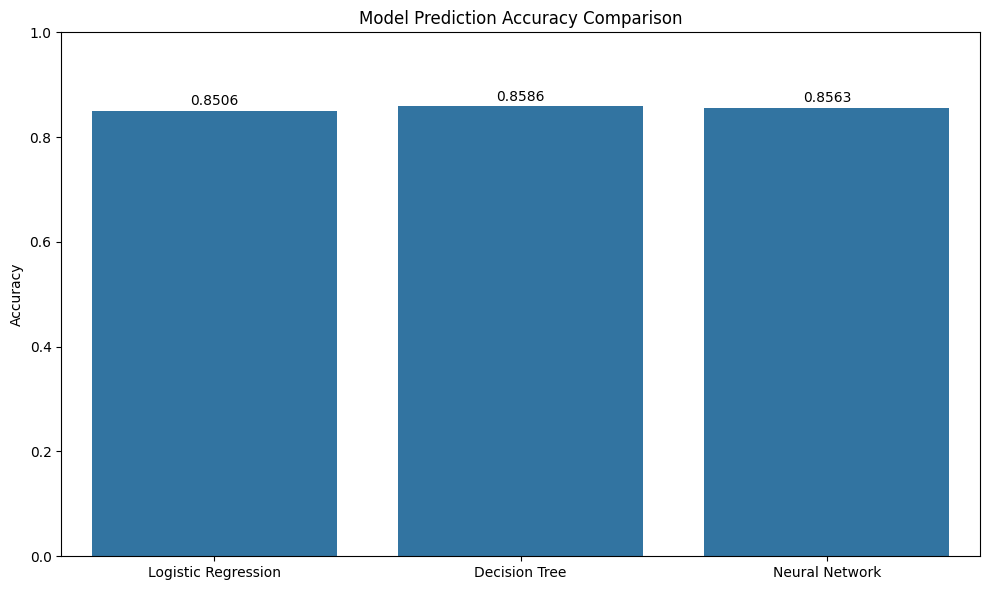

Accuracy bar chart displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names_list, y=accuracies_list)
plt.title('Model Prediction Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for index, acc_value in enumerate(accuracies_list):
    plt.text(index, acc_value + 0.01, f"{acc_value:.4f}", ha='center')
plt.tight_layout()
plt.show()
print("Accuracy bar chart displayed.")

AUC Score

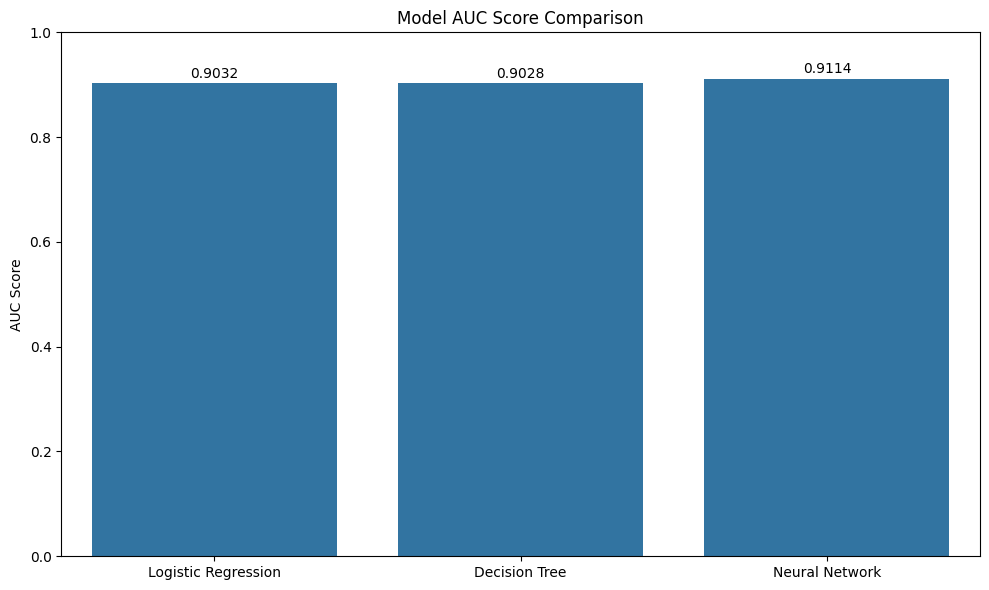

AUC Score bar chart displayed.


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names_list, y=auc_scores_list)
plt.title('Model AUC Score Comparison')
plt.ylabel('AUC Score')
plt.ylim(0, 1)
for index, auc_value_iter in enumerate(auc_scores_list):
    plt.text(index, auc_value_iter + 0.01, f"{auc_value_iter:.4f}", ha='center')
plt.tight_layout()
plt.show()
print("AUC Score bar chart displayed.")

Confusion Matrix

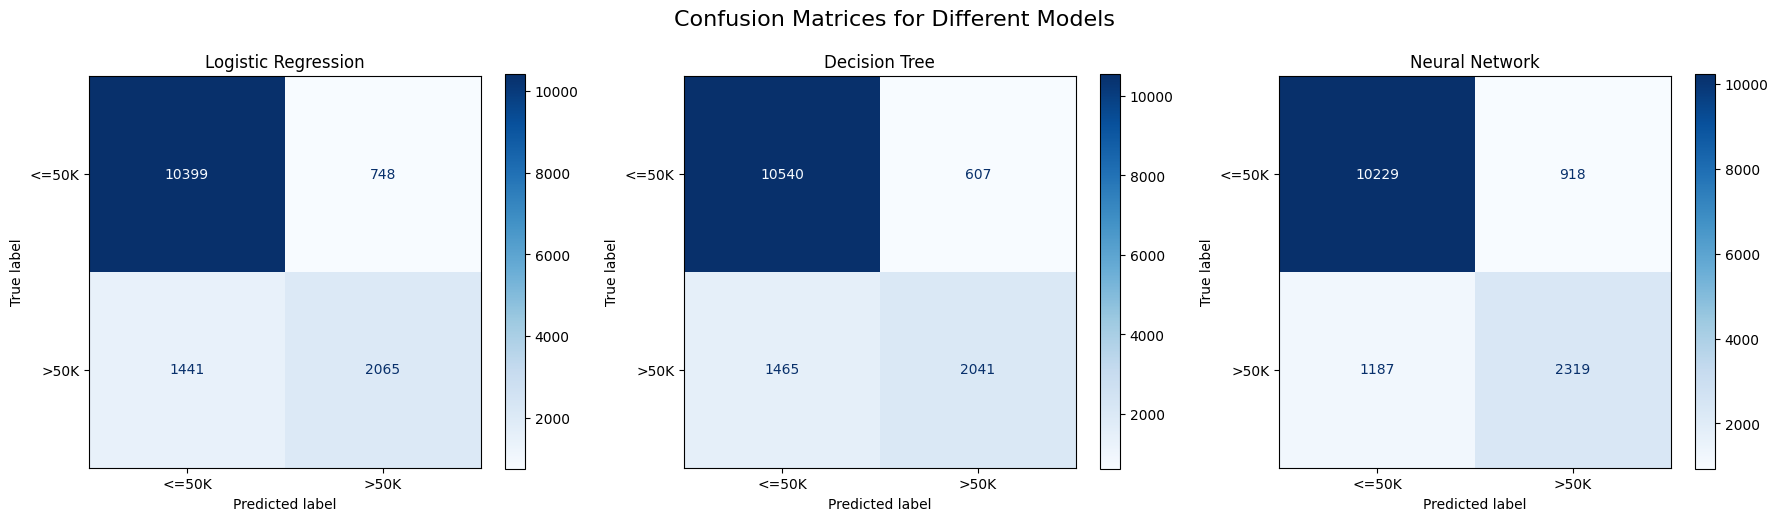

Confusion matrices displayed.


In [ ]:
fig_cm, axes_cm = plt.subplots(1, len(models), figsize=(18, 5))
if len(models) == 1: axes_cm = [axes_cm]
fig_cm.suptitle('Confusion Matrices for Different Models', fontsize=16)
for i, (model_name_iter, res_dict) in enumerate(evaluation_results.items()):
    cm_display_obj = ConfusionMatrixDisplay(
        confusion_matrix=res_dict['Confusion Matrix'], display_labels=label_encoder.classes_
    )
    axes_cm[i].set_title(model_name_iter)
    cm_display_obj.plot(ax=axes_cm[i], cmap='Blues', values_format='d')
    axes_cm[i].grid(False)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
print("Confusion matrices displayed.")

ROC Curve

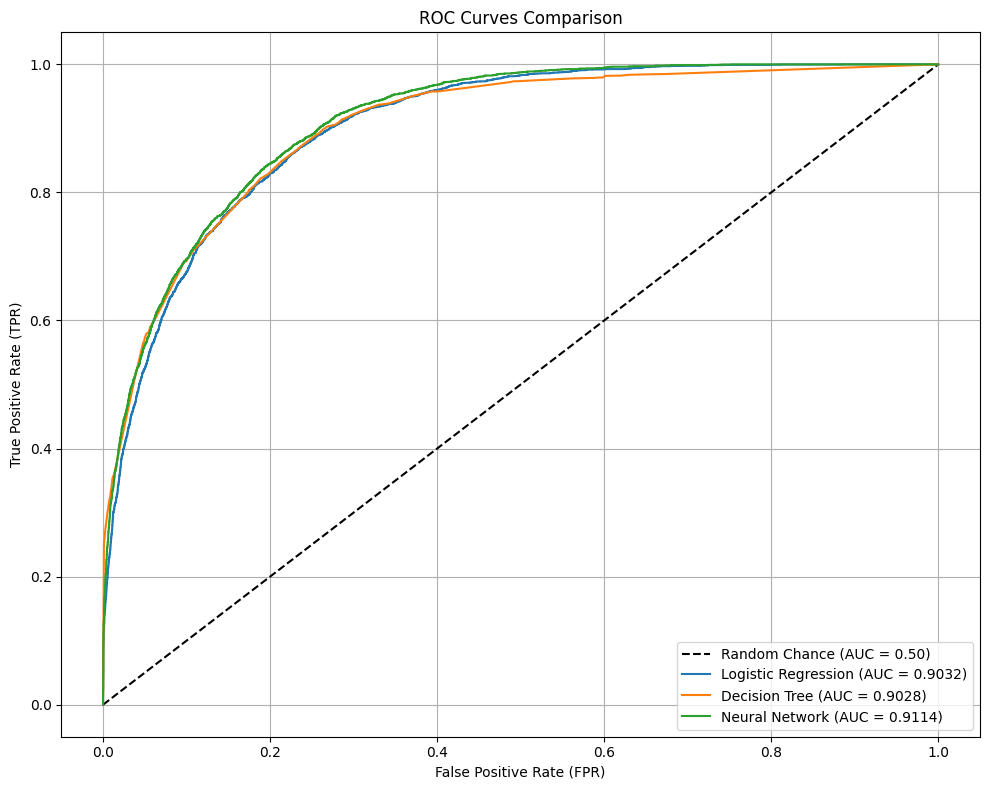

ROC curves displayed.


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
for model_name_iter, probas in model_probabilities.items():
    fpr, tpr, _thresholds = roc_curve(y_test, probas)
    auc_score_val = evaluation_results[model_name_iter]['AUC']
    plt.plot(fpr, tpr, label=f'{model_name_iter} (AUC = {auc_score_val:.4f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
print("ROC curves displayed.")

Summary

In [ ]:
summary_model_names = []
summary_accuracies = []
summary_aucs = []
summary_precisions_high_income = []
summary_recalls_high_income = []
summary_f1s_high_income = []

high_income_label_name_for_report = label_encoder.classes_[1]

for model_name_key in evaluation_results.keys():
    summary_model_names.append(model_name_key)
    summary_accuracies.append(evaluation_results[model_name_key]['Accuracy'])
    summary_aucs.append(evaluation_results[model_name_key]['AUC'])

    report_dict = classification_report(
        y_test, model_predictions[model_name_key],
        target_names=label_encoder.classes_, output_dict=True
    )
    summary_precisions_high_income.append(float(report_dict[high_income_label_name_for_report]['precision']))
    summary_recalls_high_income.append(float(report_dict[high_income_label_name_for_report]['recall']))
    summary_f1s_high_income.append(float(report_dict[high_income_label_name_for_report]['f1-score']))

summary_df_final = pd.DataFrame({
    'Model': summary_model_names,
    'Accuracy': summary_accuracies,
    'AUC': summary_aucs,
    f'Precision ({high_income_label_name_for_report})': summary_precisions_high_income,
    f'Recall ({high_income_label_name_for_report})': summary_recalls_high_income,
    f'F1-score ({high_income_label_name_for_report})': summary_f1s_high_income,
})
print(summary_df_final.to_string())

                 Model  Accuracy       AUC  Precision (>50K)  Recall (>50K)  F1-score (>50K)
0  Logistic Regression  0.850611  0.903215          0.734092       0.588990         0.653584
1        Decision Tree  0.858596  0.902770          0.770770       0.582145         0.663308
2       Neural Network  0.856343  0.911440          0.716404       0.661438         0.687824
